# Comparing KNN to OLS Regression

Find a dataset and build a KNN regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways? At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model.

[Data](https://archive.ics.uci.edu/ml/datasets/Stock+portfolio+performance#)

In [44]:
# Import modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Set aesthetics
%matplotlib inline
sns.set_style('white')
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [45]:
data = pd.read_csv('~/src/data/unit3/portfolio-performance-20-years.csv')
print(data.shape)
data.head()

(63, 19)


,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.139,0.010,1.33,0.149,0.663,0.525,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.143,0.010,1.17,0.108,0.663,0.650,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.173,0.018,1.30,0.144,0.638,0.513,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.096,-0.002,1.39,0.144,0.613,0.475,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.096,0.001,1.04,0.087,0.725,0.538,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


In [46]:
data.columns

Index(['ID', ' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return', 'Excess Return',
       'Systematic Risk', 'Total Risk', 'Abs. Win Rate', 'Rel. Win Rate',
       'Annual Return.1', 'Excess Return.1', 'Systematic Risk.1',
       'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'],
      dtype='object')

In [47]:
cols_to_drop = ['ID', 'Annual Return', 'Excess Return', 'Systematic Risk',
                'Total Risk', 'Abs. Win Rate', 'Rel. Win Rate']
df = data.drop(cols_to_drop, axis=1)
df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


In [48]:
df.columns

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return.1', 'Excess Return.1',
       'Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1',
       'Rel. Win Rate.1'],
      dtype='object')

In [49]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('.', '')
df.columns

Index(['LargeB/P', 'LargeROE', 'LargeS/P', 'LargeReturnRateinthelastquarter',
       'LargeMarketValue', 'SmallsystematicRisk', 'AnnualReturn1',
       'ExcessReturn1', 'SystematicRisk1', 'TotalRisk1', 'AbsWinRate1',
       'RelWinRate1'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
LargeB/P                           63 non-null float64
LargeROE                           63 non-null float64
LargeS/P                           63 non-null float64
LargeReturnRateinthelastquarter    63 non-null float64
LargeMarketValue                   63 non-null float64
SmallsystematicRisk                63 non-null float64
AnnualReturn1                      63 non-null float64
ExcessReturn1                      63 non-null float64
SystematicRisk1                    63 non-null float64
TotalRisk1                         63 non-null float64
AbsWinRate1                        63 non-null float64
RelWinRate1                        63 non-null float64
dtypes: float64(12)
memory usage: 6.0 KB


In [51]:
df.describe()

,LargeB/P,LargeROE,LargeS/P,LargeReturnRateinthelastquarter,LargeMarketValue,SmallsystematicRisk,AnnualReturn1,ExcessReturn1,SystematicRisk1,TotalRisk1,AbsWinRate1,RelWinRate1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.580151,0.576170,0.426494,0.391749,0.566984,0.547899
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.133358,0.137047,0.118178,0.136653,0.112803,0.159468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525811,0.519093,0.358600,0.297324,0.520000,0.411765
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.598516,0.587148,0.403418,0.368958,0.560000,0.552941
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.679636,0.669294,0.470571,0.457749,0.640000,0.694118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


## OLS regression

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.iloc[:, 7:10], df.RelWinRate1, test_size=0.4, random_state=0)

In [53]:
regr = linear_model.LinearRegression()
#Y = df['RelWinRate1'].values.reshape(-1, 1)
#X = df[['ExcessReturn1', 'SystematicRisk1', 'TotalRisk1']]
regr.fit(X_train, Y_train)

# Inspect the results.
print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared \n', regr.score(X_train, Y_train))

Coefficients 
 [ 1.09572552  1.7667181  -1.76172071]
Intercept 
 -0.13275753893278064
R-squared 
 0.7516929257632667


In [54]:
score = cross_val_score(regr, X_train, Y_train, cv=5)
print("OLS Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

OLS Accuracy: 0.62 (+/- 0.28)


In [55]:
predicted = regr.predict(X_test).ravel()
actual = Y_test
residual = actual - predicted

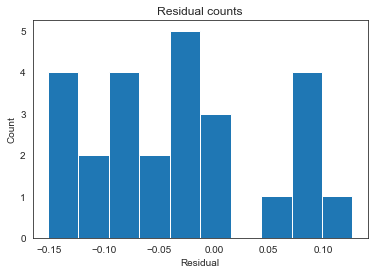

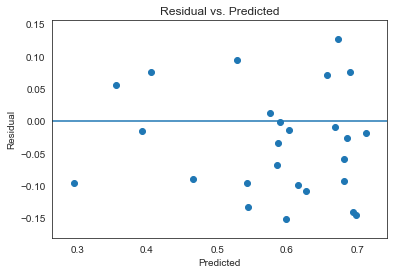

In [56]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## KNN Regression

In [57]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

In [58]:
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [59]:
score = cross_val_score(knn, X_train, Y_train, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.13 (+/- 0.61)


In [60]:
print('\nR-squared:')
print(knn.score(X_train, Y_train))


R-squared:
0.6242858852960241


In [61]:
predicted = knn.predict(X_test).ravel()
actual = Y_test

In [62]:
residual = actual - predicted

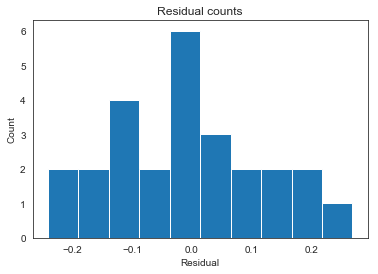

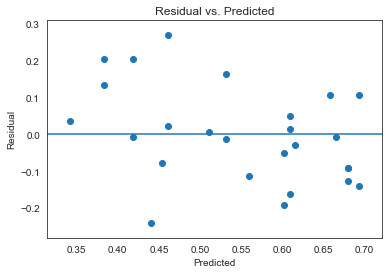

In [63]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()